In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 
from code import direct_problem as dir 

In [7]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

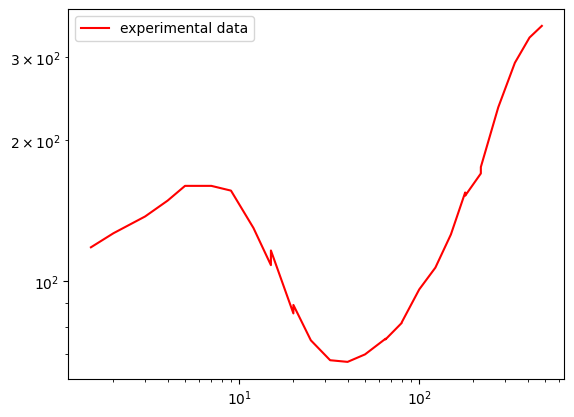

In [8]:
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

In [12]:
N_layers_list=[4] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
method='U'
start=[[70, 1,
        150, 4,
        400, 7,
        10, 30, 
        600]]
bound=[[(50,150), (0,2),
        (100,200), (0,8),
        (100,400), (0,15),
        (0,100), (0,45), 
        (200,800)]]

данные сонета
    70.33     0.58
   208.00     3.85
    80.92     9.23
    50.40    33.14
   215.62   103.32
  1882.95     0.00
start=[[70.33, 0.58, 208, 3.85, 80.92, 9.23, 50.40, 33.14, 215.62, 103.32, 1882.95]]

30.65506820234449


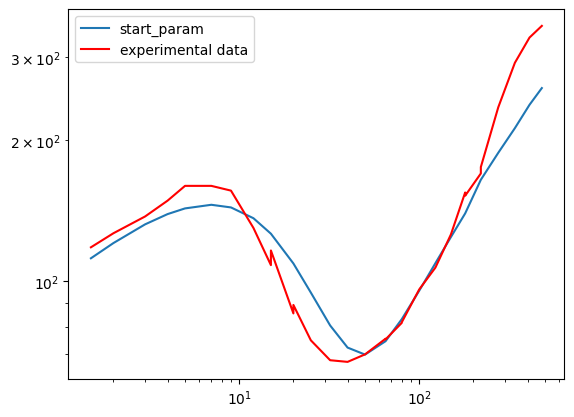

In [10]:
rk_start=[]
for r in AB2:
    rk_start.append(dir.calculate_apparent_resistance(start[0],method,r,num_of_zeros=10*int(1+r/200)))
rk_start=np.array(rk_start)
plt.loglog(AB2,rk_start, label='start_param')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()
print(inv.RMSE(rk_start,experimental_rhoa))

In [13]:
inverse=inv.inverse_problem_solver(N_layers_list,method, exp_data, start=start,boundaries=bound) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:572: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


0


In [14]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i], '\nparam =', results[i].x, '\nloss =', results[i].fun)


number of layers=  4 
param = [ 70.04694299   0.98961211 150.95293485   1.26003058 399.12588991
   5.80073581  13.23864187  29.06705474 602.75990755] 
loss = 19.76212190735029


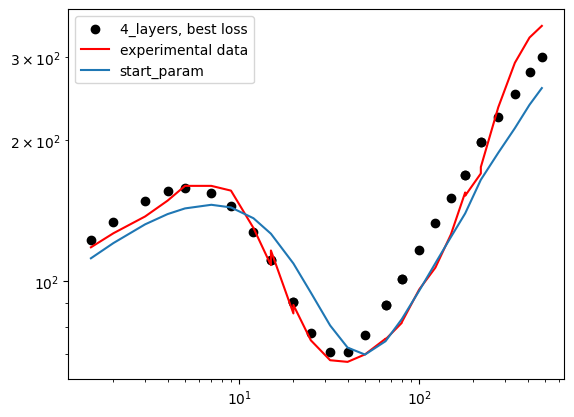

In [15]:
# Визуализация
for i in range(len(N_layers_list)):
    rk=[]
    for r in AB2:
        rk.append(dir.calculate_apparent_resistance(results[i].x,method,r,num_of_zeros=10*int(1+r/200)))

    if i==ind:
        plt.scatter(AB2,rk, c='black',label=f'{N_layers_list[i]}_layers, best loss')
    else: plt.loglog(AB2,rk, label=f'{N_layers_list[i]}_layers')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.loglog(AB2,rk_start, label='start_param')
plt.legend()